In [2]:
import torch
import torch.nn as nn

# Dummy input: 1 grayscale image of size 28x28
image = torch.randn(1, 1, 28, 28)  # (batch_size, channels, height, width)

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, padding=1)
        # print(self.conv1)
        self.pool = nn.MaxPool2d(2, 2)
        # print(self.pool)
        self.fc = nn.Linear(4 * 14 * 14, 10)
        print(self.fc)

    def forward(self, x):
        # print("Input shape:", x.shape)  # (1, 1, 28, 28)
        x = self.conv1(x)
        # print("After conv1 (before ReLU):", x.shape)
        # print("conv1 raw output:", x[0, 0, :5, :5])  # show top-left 5x5 of first channel

        x = torch.relu(x)
        # print("After ReLU:", x[0, 0, :5, :5])  # show ReLU output for first channel

        x = self.pool(x)
        print("After MaxPool:", x.shape)  # (1, 4, 14, 14)

        #x = x.view(-1, 4 * 14 * 14)
        x = torch.flatten(x, 1)  # same as x.view(-1, 4*14*14)
        print('before',x.shape)
        x = self.fc(x)
        print('after',x)
        print("Final output shape:", x.shape)  # (1, 10)
        return x

model = SimpleCNN()
output = model(image)
# print(model)

Linear(in_features=784, out_features=10, bias=True)
After MaxPool: torch.Size([1, 4, 14, 14])
before torch.Size([1, 784])
after tensor([[-0.5330,  0.1944, -0.0012, -0.3370,  0.4287, -0.5748, -0.3092,  0.2726,
         -0.3534,  0.4587]], grad_fn=<AddmmBackward0>)
Final output shape: torch.Size([1, 10])


| Step             | Shape            | What happens                  |
| ---------------- | ---------------- | ----------------------------- |
| Input            | `[1, 1, 28, 28]` | 1 image, 1 channel            |
| After conv1      | `[1, 4, 28, 28]` | 4 feature maps from 4 filters |
| After ReLU       | `[1, 4, 28, 28]` | Same shape, negatives → 0     |
| After MaxPool    | `[1, 4, 14, 14]` | Each 2x2 block shrinks to 1   |
| After flattening | `[1, 784]`       | Flattened to pass into `fc`   |
| Final output     | `[1, 10]`        | 10 class scores               |


In [3]:
# l=loss(y,output)
# l.backward()
# g.grad()   w=w-lr*dl/dw

On an image

In [4]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Load your image (replace 'your_image.png' with your actual filename)
img = Image.open(r"C:\Users\chaud\Downloads\train.png").convert('L')  # 'L' converts to grayscale

# Transform to tensor and resize to 28x28
transform = transforms.Compose([
    transforms.Resize((28, 28)),       # Resize to 28x28
    transforms.ToTensor(),             # Convert to tensor, scales to [0, 1]
])

image_tensor = transform(img)  # shape: [1, 28, 28]       Image becomes a 3D tensor: [channels=1, height=28, width=28]

# Add batch dimension: [1, 1, 28, 28]
image_tensor = image_tensor.unsqueeze(0)     #New shape: [batch_size=1, channels=1, height=28, width=28] → [1, 1, 28, 28]




In [5]:
import torch
import torch.nn as nn

# Dummy input: 1 grayscale image of size 28x28
image = image_tensor  # (batch_size, channels, height, width)

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(4 * 14 * 14, 10)
        

    def forward(self, x):
        # print("Input shape:", x.shape)  # (1, 1, 28, 28)
        x = self.conv1(x)
        # print("After conv1 (before ReLU):", x.shape)
        # print("conv1 raw output:", x[0, 0, :5, :5])  # show top-left 5x5 of first channel

        x = torch.relu(x)
        # print("After ReLU:", x[0, 0, :5, :5])  # show ReLU output for first channel

        x = self.pool(x)
        print("After MaxPool:", x.shape)  # (1, 4, 14, 14)

        #x = x.view(-1, 4 * 14 * 14)
        x = torch.flatten(x, 1)  # same as x.view(-1, 4*14*14)
        print('before',x.shape)
        x = self.fc(x)
        print('after',x)
        print("Final output shape:", x.shape)  # (1, 10)
        return x

# model = SimpleCNN()
output = model(image)
# print(model)

After MaxPool: torch.Size([1, 4, 14, 14])
before torch.Size([1, 784])
after tensor([[-0.6981, -0.0603, -0.1277, -0.1701,  0.1931, -0.5323, -0.8462,  0.5240,
         -0.2221,  0.3658]], grad_fn=<AddmmBackward0>)
Final output shape: torch.Size([1, 10])


# Train the CNN on MNIST

In [1]:
# data loader
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Path to your dataset folder
data_path = r"F:\Python\NN\2.1\Cnn\datamnist60"

# Define transforms
transform = transforms.Compose([
    transforms.Grayscale(),             # Ensure grayscale
    transforms.Resize((28, 28)),        # Resize to 28x28
    transforms.ToTensor(),              # Convert to tensor and normalize to [0,1]
])

# Create dataset
dataset = datasets.ImageFolder(root=data_path, transform=transform)
print("Dataset =",dataset)
# Create DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)




# Making the model
import torch.nn as nn
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,10,kernel_size=5,stride=1)
    self.conv2 = nn.Conv2d(10,10,kernel_size=5,stride=1)
    self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #2x2 maxpool
    self.fc1 = nn.Linear(4*4*10,100)
    self.fc2 = nn.Linear(100,10)
  
  def forward(self,x):

    x = F.relu(self.conv1(x)) #24x24x10

    x = self.pool(x) #12x12x10
    
    x = F.relu(self.conv2(x)) #8x8x10
    
    x = self.pool(x) #4x4x10    
    
    x = x.view(-1, 4*4*10) #flattening
    
    x = F.relu(self.fc1(x))
    
    x = self.fc2(x)
    
    return x

model = Net()
print(model)

Dataset = Dataset ImageFolder
    Number of datapoints: 600
    Root location: F:\Python\NN\2.1\Cnn\datamnist60
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=160, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = Net().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Good for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10  # You can increase this
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for batch_idx, (images, labels) in enumerate(data_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()             # Zero the gradients
        outputs = model(images)           # Forward pass
        loss = criterion(outputs, labels) # Compute loss
        loss.backward()                   # Backpropagation
        optimizer.step()                  # Update weights

        running_loss += loss.item()

        if (batch_idx + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx+1}/{len(data_loader)}], Loss: {loss.item():.4f}")

    print(f"Epoch [{epoch+1}/{epochs}], Average Loss: {running_loss / len(data_loader):.4f}")

print("✅ Training complete.")


Epoch [1/10], Step [10/19], Loss: 2.2823
Epoch [1/10], Average Loss: 2.2855
Epoch [2/10], Step [10/19], Loss: 2.0606
Epoch [2/10], Average Loss: 2.0883
Epoch [3/10], Step [10/19], Loss: 1.3742
Epoch [3/10], Average Loss: 1.3506
Epoch [4/10], Step [10/19], Loss: 1.1893
Epoch [4/10], Average Loss: 0.7547
Epoch [5/10], Step [10/19], Loss: 0.6540
Epoch [5/10], Average Loss: 0.5839
Epoch [6/10], Step [10/19], Loss: 0.8062
Epoch [6/10], Average Loss: 0.5204
Epoch [7/10], Step [10/19], Loss: 0.4140
Epoch [7/10], Average Loss: 0.4165
Epoch [8/10], Step [10/19], Loss: 0.3885
Epoch [8/10], Average Loss: 0.3880
Epoch [9/10], Step [10/19], Loss: 0.3151
Epoch [9/10], Average Loss: 0.3160
Epoch [10/10], Step [10/19], Loss: 0.2303
Epoch [10/10], Average Loss: 0.2937
✅ Training complete.


In [3]:
torch.save(model.state_dict(), R"F:\Python\NN\2.1\Cnn\cnn_model.pth")
print("✅ Model weights saved to cnn_model.pth")


✅ Model weights saved to cnn_model.pth


In [4]:
import torch.nn.functional as F

# Put model in evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    for images, labels in data_loader:
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class

        print("Predicted labels:", predicted.tolist())
        print("Actual labels   :", labels.tolist())
        break  # Only check one batch


Predicted labels: [3, 4, 6, 7, 9, 8, 2, 9, 6, 4, 6, 5, 7, 8, 2, 7, 5, 7, 9, 7, 5, 0, 7, 6, 1, 7, 7, 4, 8, 6, 2, 3]
Actual labels   : [3, 4, 6, 9, 9, 8, 2, 9, 6, 4, 6, 5, 7, 8, 2, 7, 5, 7, 9, 7, 5, 0, 7, 6, 1, 7, 3, 7, 8, 6, 2, 3]


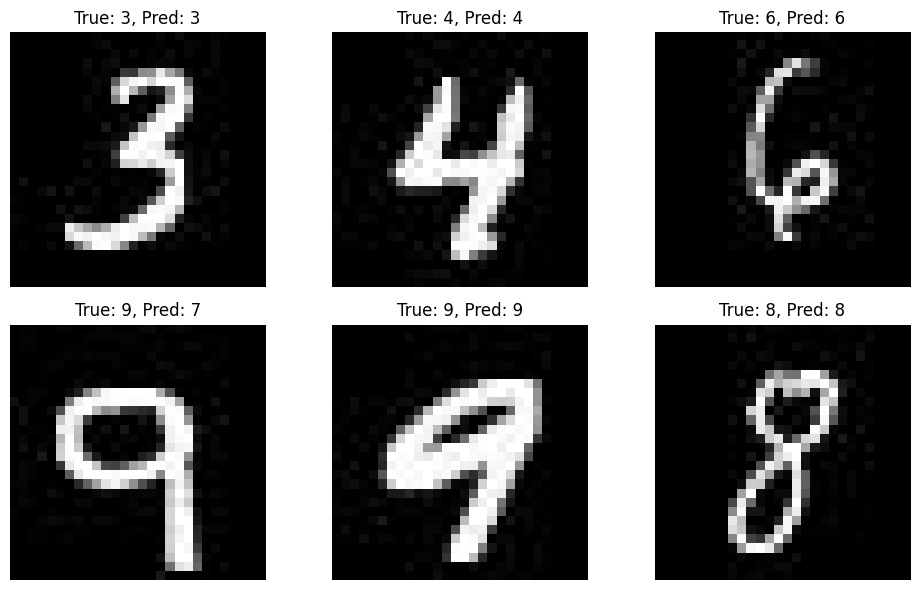

In [5]:
import matplotlib.pyplot as plt

# Just 6 samples from the batch
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
images = images[:6]
labels = labels[:6]
predicted = predicted[:6]

for i in range(6):
    ax = axs[i // 3, i % 3]
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f"True: {labels[i]}, Pred: {predicted[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [6]:
# Switch model to evaluation mode (important for layers like dropout)
model.eval()

# List to store predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():  # Turn off gradients to save memory during inference
    for images, labels in data_loader:
        outputs = model(images)  # Get model's predictions
        _, preds = torch.max(outputs, 1)  # Convert logits to class predictions
        all_preds.append(preds)
        all_labels.append(labels)

# Convert lists to tensors for comparison
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

# Calculate accuracy
accuracy = (all_preds == all_labels).float().mean()
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8983


# How the forward pass works

In [8]:
import torch
import torch.nn as nn

# Input and target
x = torch.tensor(5.5)
y = torch.tensor(0.0)

# Parameters with gradients
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Linear transformation
z = x * w + b
# y_pred = x * w + b


In [9]:
y_pred=torch.sigmoid(z)
y_pred

tensor(0.9959, grad_fn=<SigmoidBackward0>)

In [10]:
def binary_cross_entropy_loss(y_true, y_pred):
    # Ensure predicted values are in the range [0, 1]
    epsilon=1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)  # Avoid log(0) issues
    loss = -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return loss

In [11]:
loss=binary_cross_entropy_loss(y,y_pred)
loss
# tensor(5.5041, grad_fn=<NegBackward0>)


tensor(5.5041, grad_fn=<NegBackward0>)

In [12]:
loss.backward() 


In [13]:
w.grad # dl/dw

tensor(5.4776)

In [14]:
b.grad

tensor(0.9959)

In [15]:
lr=0.01
w = w-(lr*w.grad) # GD
w

tensor(0.9452, grad_fn=<SubBackward0>)

In [16]:
b=b-(lr*b.grad)
b

tensor(-0.0100, grad_fn=<SubBackward0>)

In [17]:
# y_pred=w*x+b
z=w*x+b

In [18]:
y_pred=torch.sigmoid(z)
y_pred

tensor(0.9945, grad_fn=<SigmoidBackward0>)

In [19]:
loss=binary_cross_entropy_loss(y,y_pred)
loss
# tensor(5.1943, grad_fn=<NegBackward0>)

tensor(5.1943, grad_fn=<NegBackward0>)